In [1]:
import re
from datetime import datetime

## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for machine learning
from sklearn import metrics, preprocessing
# for deep learning
from keras import models, layers, utils
import tensorflow as tf

In [2]:
users = pd.read_csv('assets/csv/users_dataset.csv').head(1000)
products = pd.read_csv('assets/csv/preprocessed_shoes.csv').head(1000)
interactions = pd.read_csv('assets/csv/interactions_dataset.csv').head(1000)

In [3]:
users.gender = pd.Categorical(users.gender)
users['gender_code'] = users.gender.cat.codes
users.marriage_status = pd.Categorical(users.marriage_status)
users['marriage_status_code'] = users.marriage_status.cat.codes
users.country = pd.Categorical(users.country)
users['country_code'] = users.country.cat.codes
users.id = pd.Categorical(users.id)
users['user_id_code'] = users.id.cat.codes

df_interactions = interactions.copy()

df_interactions.interaction_type = pd.Categorical(df_interactions.interaction_type)
df_interactions['interaction_code'] = df_interactions.interaction_type.cat.codes

products.heel_type = pd.Categorical(products.heel_type)
products['heel_type_code'] = products.heel_type.cat.codes
products.shoe_width = pd.Categorical(products.shoe_width)
products['shoe_width_code'] = products.shoe_width.cat.codes
products.brand = pd.Categorical(products.brand)
products['brand_code'] = products.brand.cat.codes
products.asin = pd.Categorical(products.asin)
products['target_id_code'] = products.asin.cat.codes

df_interactions = df_interactions[['user_id', 'target_id', 'interaction_code']]
df_interactions.user_id = pd.Categorical(df_interactions.user_id)
df_interactions['user_id_code'] = df_interactions.user_id.cat.codes
df_interactions.target_id = pd.Categorical(df_interactions.target_id)
df_interactions['target_id_code'] = df_interactions.target_id.cat.codes

In [4]:
df_interactions.head()

,user_id,target_id,interaction_code,user_id_code,target_id_code
0,a43c037aeba063c93667fa96d42a2256,B01JT42MA8,5,637,109
1,73f141a60df71760d1ddd0b94c65d26a,B07TPNHV2S,0,435,451
2,38cfec0597f01736577d81af292c779d,B073DNLNZ4,1,215,171
3,8b96087c0185882a8a79b68ddb450efd,B08F5BWB6V,4,536,739
4,8b7be78ff7a6d07a66a1c15c36be1b3d,B08KH7M4LL,2,534,796


In [5]:
products.head()

,level_0,title,price,brand,asin,outer_material,inner_material,sole,closure,heel_height,heel_type,shoe_width,heel_type_code,shoe_width_code,brand_code,target_id_code
0,0,"Geox Jr Sandal Strada B Fisherman, Brown Red, ...",50.000,Visit the Geox Store,B08BLP231K,Synthetic,Synthetic,Rubber,Strap,2.0,flat,medium,3,1,294,704
1,1,Fila Women's Oakmont Tr Sneaker,142.260,Fila,B08N587YZ9,fabric,NaN,Rubber,Lace-Up,0.0,no heel,medium,9,1,86,842
2,2,Merrell Women'S Bare Access Xtr Trail Running ...,124.720,Visit the Merrell Store,B07KMB98CG,Synthetic,Manmade,Synthetic,Lace-Up,0.0,no heel,medium,9,1,322,340
3,3,Desigual Women's Shoes_Runner_cmofl Sneakers W...,60.030,Desigual,B08CN3S1ZK,Polyester,Synthetic,Rubber,Lace-Up,0.0,flat,medium,3,1,66,732
4,4,Aquatalia Men's Adamo Dress Calf Penny Loafer,181.835,Aquatalia,B07KJX15DV,NaN,NaN,Rubber,Pull On,0.0,no heel,medium,9,1,8,336


In [6]:
users.head()

,id,name,gender,age,date_joined,marriage_status,balance,country,gender_code,marriage_status_code,country_code,user_id_code
0,0ed37b7778b21e1c372b9db4141e89f8,Aaron Kidd,female,68,1.479004e+09,married,54319,Myanmar,0,0,145,53
1,e96fd6cc0dfb65309e6cb6bcc31b2214,Melissa Sweeney,male,88,1.403332e+09,single,61513,Gibraltar,1,1,80,915
2,a414790b371d4ea4543d7a0223b71ed2,Christopher Wilson,male,74,1.441466e+09,married,24490,Greenland,1,0,82,626
3,4d92ebc35c6868c8982f0c19e8380a18,Tara Sanders,male,100,2.342396e+08,single,58123,Mongolia,1,1,140,282
4,148f9f0d38bdcb04ceb7dece9c8e564c,Pedro Ford,female,83,1.454799e+09,married,91127,Montenegro,0,0,141,80


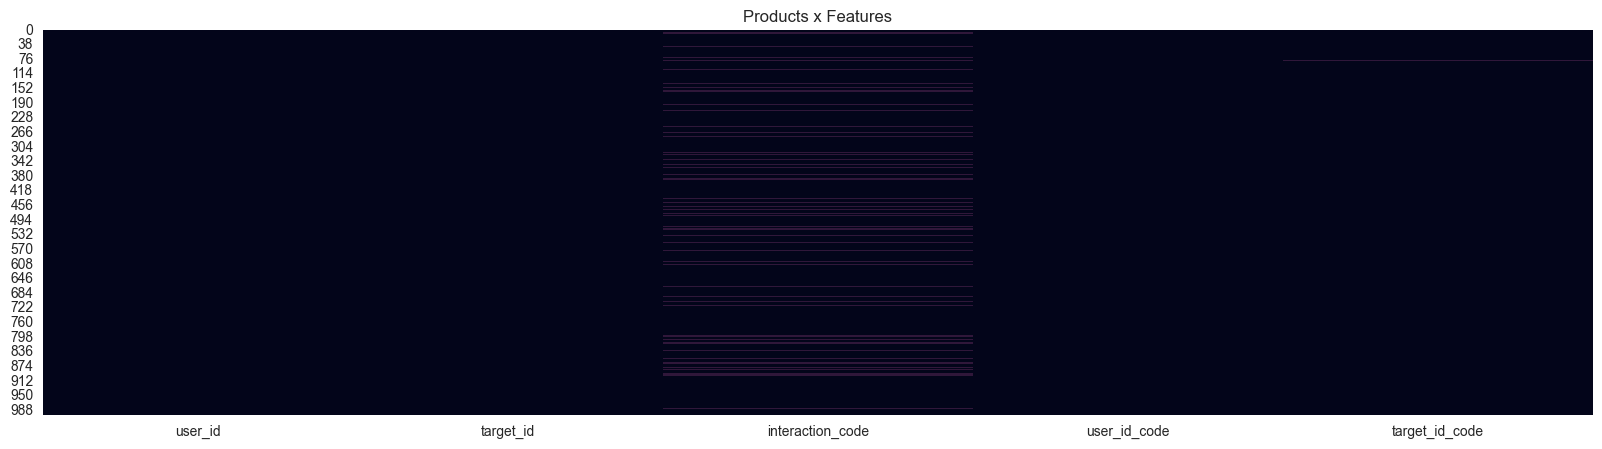

In [7]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(df_interactions==1, vmin=0, vmax=8, cbar=False, ax=ax).set_title("Products x Features")
plt.show()

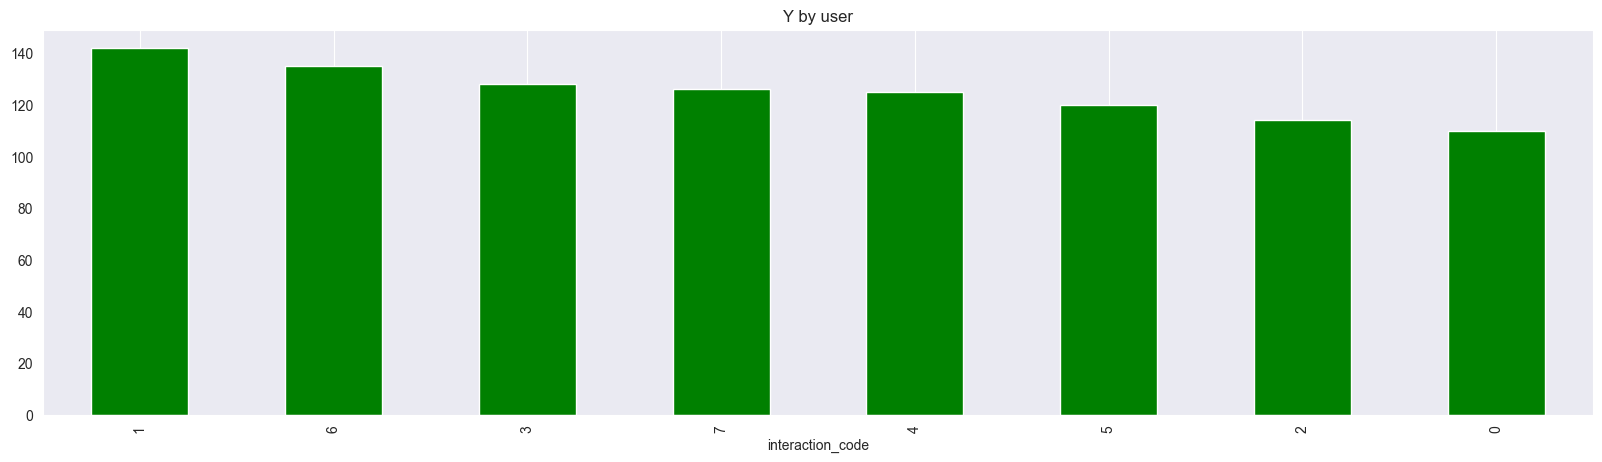

In [8]:
df_interactions.groupby("interaction_code").count()["target_id_code"].sort_values(ascending=False).plot(
    kind="bar", color="green", title="Y by user", figsize=(20,5)).grid(axis='y')

In [9]:
tmp = df_interactions.copy()
dtf_users = tmp.pivot_table(index="user_id_code", columns="target_id_code", values="interaction_code")
# missing_cols = list(set(df_interactions.index) - set(dtf_users.columns))
# for col in missing_cols:
#     dtf_users[col] = np.nan
# dtf_users = dtf_users[sorted(dtf_users.columns)]
dtf_users

target_id_code,0,1,2,3,4,5,6,7,8,9,...,937,938,939,940,941,942,943,944,945,946
user_id_code,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dtf_users)

print(train.shape)
print(test.shape)
print("non-null data in train set:", train[train>0].count().sum())
print("non-null data in test set:", test[test>0].count().sum())

(715, 947)
(239, 947)
non-null data in train set: 653
non-null data in test set: 237


In [11]:
features = products[['target_id_code',"price",'heel_height','heel_type_code','shoe_width_code', 'brand_code']]
context = df_interactions[['interaction_code', 'target_id_code']]

train = train.stack(dropna=True).reset_index().rename(columns={0:"y"})
train = train.head(1000)
train

,user_id_code,target_id_code,y
0,330,7,6.0
1,786,785,2.0
2,878,790,3.0
3,712,458,6.0
4,854,736,6.0
...,...,...,...
734,612,688,6.0
735,432,467,1.0
736,45,480,6.0
737,582,186,1.0


In [12]:
train = train.merge(features, how="left", left_on="target_id_code", right_on='target_id_code')
train = train.merge(context, how="left", left_on="target_id_code", right_on='target_id_code')

train

,user_id_code,target_id_code,y,price,heel_height,heel_type_code,shoe_width_code,brand_code,interaction_code
0,330,7,6.0,94.655,5.08,3,1,364,6
1,786,785,2.0,63.980,0.00,9,1,6,2
2,878,790,3.0,19.145,0.00,3,1,310,3
3,712,458,6.0,103.740,546.10,7,1,81,6
4,712,458,6.0,103.740,546.10,7,1,81,5
...,...,...,...,...,...,...,...,...,...
818,612,688,6.0,20.155,0.00,9,1,374,6
819,432,467,1.0,19.990,0.00,3,1,330,1
820,45,480,6.0,200.105,0.00,9,6,371,6
821,582,186,1.0,48.065,0.00,9,1,63,1


In [13]:
test = test.stack(dropna=True).reset_index().rename(columns={0:"y"})
test = test.head(1000)
test

,user_id_code,target_id_code,y
0,540,30,5.0
1,777,634,4.0
2,96,184,7.0
3,510,534,7.0
4,755,62,7.0
...,...,...,...
256,423,872,7.0
257,505,718,1.0
258,364,195,7.0
259,616,608,2.0


In [14]:
test = test.merge(features, how="left", left_on="target_id_code", right_on='target_id_code')
test = test.merge(context, how="left", left_on="target_id_code", right_on='target_id_code')

test

,user_id_code,target_id_code,y,price,heel_height,heel_type_code,shoe_width_code,brand_code,interaction_code
0,540,30,5.0,41.030,0.00,7,1,295,5
1,777,634,4.0,16.460,5.00,3,1,92,4
2,96,184,7.0,42.390,2.00,3,1,358,7
3,510,534,7.0,37.900,5.00,13,1,167,7
4,755,62,7.0,45.310,0.25,0,1,346,7
...,...,...,...,...,...,...,...,...,...
286,423,872,7.0,89.600,0.00,9,1,2,7
287,505,718,1.0,168.625,0.00,9,1,278,1
288,364,195,7.0,98.160,0.00,9,1,338,7
289,616,608,2.0,148.000,0.00,9,1,371,2


In [15]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

[]


In [16]:
embeddings_size = 50
usr, prd = dtf_users.shape[0], dtf_users.shape[1]

# Users (,1,embedding_size) and Reshape (,embedding_size)
xusers_in = layers.Input(name="xusers_in", shape=(1,))
xusers_emb = layers.Embedding(name="xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
xusers = layers.Reshape(name='xusers', target_shape=(embeddings_size,))(xusers_emb)

# Products (,1,embedding_size) and Reshape (,embedding_size)
xproducts_in = layers.Input(name="xproducts_in", shape=(1,))
xproducts_emb = layers.Embedding(name="xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
xproducts = layers.Reshape(name='xproducts', target_shape=(embeddings_size,))(xproducts_emb)

# Product (,1) values[-1,1]
xx = layers.Dot(name='xx', normalize=True, axes=1)([xusers, xproducts])

# Predict ratings (,1)
y_out = layers.Dense(name="y_out", units=1, activation='linear')(xx)

# Compile
model = models.Model(inputs=[xusers_in,xproducts_in], outputs=y_out, name="CollaborativeFiltering")
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])
model.summary()

Model: "CollaborativeFiltering"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 xusers_in (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 xproducts_in (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 xusers_emb (Embedding)         (None, 1, 50)        47700       ['xusers_in[0][0]']              
                                                                                                  
 xproducts_emb (Embedding)      (None, 1, 50)        47350       ['xproducts_in[0][0]']           
                                                                             

In [17]:
'''
Plot loss and metrics of keras training.
'''
def utils_plot_keras_training(training):
    metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))

    ## training
    ax[0].set(title="Training")
    ax11 = ax[0].twinx()
    ax[0].plot(training.history['loss'], color='black')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax11.plot(training.history[metric], label=metric)
    ax11.set_ylabel("Score", color='steelblue')
    ax11.legend()

    ## validation
    ax[1].set(title="Validation")
    ax22 = ax[1].twinx()
    ax[1].plot(training.history['val_loss'], color='black')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax22.plot(training.history['val_'+metric], label=metric)
    ax22.set_ylabel("Score", color="steelblue")
    plt.show()

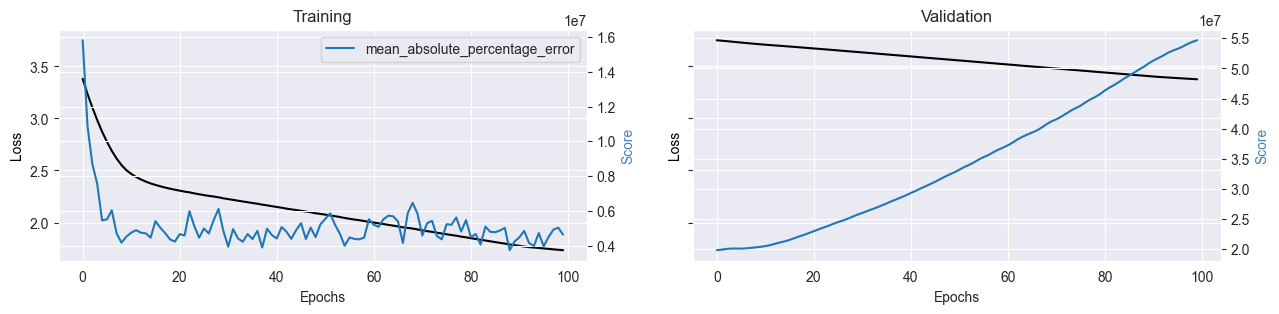

In [18]:
# train
training = model.fit(x=[train["user_id_code"], train["target_id_code"]], y=train["y"],
                     epochs=100, batch_size=128, shuffle=True, verbose=0, validation_split=0.3)
model = training.model
utils_plot_keras_training(training)

In [19]:
# test
test["yhat"] = model.predict([test["user_id_code"], test["target_id_code"]])
test

10/10 [==============================] - 0s 777us/step


,user_id_code,target_id_code,y,price,heel_height,heel_type_code,shoe_width_code,brand_code,interaction_code,yhat
0,540,30,5.0,41.030,0.00,7,1,295,5,0.843419
1,777,634,4.0,16.460,5.00,3,1,92,4,0.669964
2,96,184,7.0,42.390,2.00,3,1,358,7,-0.018139
3,510,534,7.0,37.900,5.00,13,1,167,7,0.323125
4,755,62,7.0,45.310,0.25,0,1,346,7,0.458989
...,...,...,...,...,...,...,...,...,...,...
286,423,872,7.0,89.600,0.00,9,1,2,7,0.435652
287,505,718,1.0,168.625,0.00,9,1,278,1,0.571287
288,364,195,7.0,98.160,0.00,9,1,338,7,0.343335
289,616,608,2.0,148.000,0.00,9,1,371,2,0.390722


In [20]:
# overall
y_test = test["y"]
predicted = test["yhat"]

print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", str(round(np.mean(np.abs((y_test-predicted)/predicted)), 2))+"%")

Mean Absolute Error (Σ|y-pred|/n): 3
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 17.46%


In [21]:
# Evaluate
def mean_reciprocal_rank(y_test, predicted):
    score = []
    for product in y_test:
        mrr = 1 / (list(predicted).index(product) + 1) if product in predicted else 0
        score.append(mrr)
    return np.mean(score)

In [29]:
# single case
i = 652
print("--- user", i, "---")

top = 5
y_test = test[test["user_id_code"]==i].sort_values("y", ascending=False)["target_id_code"].values[:top]
print("y_test:", y_test)

predicted = test[test["user_id_code"]==i].sort_values("yhat", ascending=False)["target_id_code"].values[:top]
print("predicted:", predicted)

true_positive = len(list(set(y_test) & set(predicted)))
print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
print("accuracy:", str(round(metrics.accuracy_score(y_test,predicted)*100,1))+"%")
print("mrr:", round(mean_reciprocal_rank(y_test, predicted),2))

--- user 652 ---
y_test: [213 685]
predicted: [213 685]
true positive: 2 (40.0%)
accuracy: 100.0%
mrr: 0.75


In [30]:
embeddings_size = 50
usr, prd = dtf_users.shape[0], dtf_users.shape[1]
feat = len(features)
ctx = len(context)

########################################## COLLABORATIVE FILTERING ###################################################
# Input layer
xusers_in = layers.Input(name="xusers_in", shape=(1,))
xproducts_in = layers.Input(name="xproducts_in", shape=(1,))

# A) Matrix Factorization
## embeddings and reshape
cf_xusers_emb = layers.Embedding(name="cf_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
cf_xusers = layers.Reshape(name='cf_xusers', target_shape=(embeddings_size,))(cf_xusers_emb)
## embeddings and reshape
cf_xproducts_emb = layers.Embedding(name="cf_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
cf_xproducts = layers.Reshape(name='cf_xproducts', target_shape=(embeddings_size,))(cf_xproducts_emb)
## product
cf_xx = layers.Dot(name='cf_xx', normalize=True, axes=1)([cf_xusers, cf_xproducts])

# B) Neural Network
## embeddings and reshape
nn_xusers_emb = layers.Embedding(name="nn_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
nn_xusers = layers.Reshape(name='nn_xusers', target_shape=(embeddings_size,))(nn_xusers_emb)
## embeddings and reshape
nn_xproducts_emb = layers.Embedding(name="nn_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
nn_xproducts = layers.Reshape(name='nn_xproducts', target_shape=(embeddings_size,))(nn_xproducts_emb)
## concat and dense
nn_xx = layers.Concatenate()([nn_xusers, nn_xproducts])
nn_xx = layers.Dense(name="nn_xx", units=int(embeddings_size/2), activation='relu')(nn_xx)

########################################## CONTENT BASED ###################################################
# Product Features
features_in = layers.Input(name="features_in", shape=(feat,))
features_x = layers.Dense(name="features_x", units=feat, activation='relu')(features_in)

########################################## KNOWLEDGE BASED #################################################
# Context
contexts_in = layers.Input(name="contexts_in", shape=(ctx,))
context_x = layers.Dense(name="context_x", units=ctx, activation='relu')(contexts_in)

########################################## OUTPUT ###################################################
# Merge all
y_out = layers.Concatenate()([cf_xx, nn_xx, features_x, context_x])
y_out = layers.Dense(name="y_out", units=1, activation='linear')(y_out)

# Compile
model = models.Model(inputs=[xusers_in,xproducts_in, features_in, contexts_in], outputs=y_out, name="Hybrid_Model")
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])
model.summary()

Model: "Hybrid_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 xusers_in (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 xproducts_in (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 nn_xusers_emb (Embedding)      (None, 1, 50)        47700       ['xusers_in[0][0]']              
                                                                                                  
 nn_xproducts_emb (Embedding)   (None, 1, 50)        47350       ['xproducts_in[0][0]']           
                                                                                       

In [31]:
# train
training = model.fit(x=[train["user_id_code"], train["target_id_code"], train[features], train[context]], y=train["y"],
                     epochs=100, batch_size=128, shuffle=True, verbose=0, validation_split=0.3)

ValueError: Boolean array expected for the condition, not int16

In [ ]:
model = training.model
utils_plot_keras_training(training)

In [ ]:
# test
test["yhat"] = model.predict([test["user_id_code"], test["target_id_code"]])
test

In [ ]:
# overall
y_test = test["y"]
predicted = test["yhat"]

print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", str(round(np.mean(np.abs((y_test-predicted)/predicted)), 2))+"%")